In [2]:
#pip install langdetect

In [6]:
from langdetect import detect
import pandas as pd
import numpy as np

In [8]:
# import data
tweets_df= pd.read_csv('../../datasets/data-prepared.csv')
tweets_df.head()

,text,quotes,is.retweet,external.link,pictures,videos,gifs,multimedial_content,user.image,user.bio,user.website,user.tweets,user.following,user.media,engagement.rate,n_hashtags
0,Fried Chicken with Hot 🔥 Sauce Corn Muffin and...,1,True,False,True,False,False,True,True,True,True,16213,549,15698,0.571817,8
1,#Morel #mushrooms at center of #food #poisonin...,0,False,False,False,False,False,False,True,True,True,50098,513,1962,0.000000,10
2,My Blog:: Obama Legacy Facing REVISIT ... Ian...,0,False,False,False,False,False,False,True,True,True,5174,9022,0,0.008527,11
3,Craving sushi but tired of expensive takeout? ...,0,False,False,False,False,False,False,True,True,True,108071,678,49647,0.000000,6
4,Potato Pancakes should not be a rare side dish...,0,False,False,True,False,False,True,True,True,True,28081,2343,18032,0.000000,8


In [10]:
testo= tweets_df.loc[0,'text']
testo

'Fried Chicken with Hot 🔥 Sauce Corn Muffin and Seasoned Fries 🍟  homecookingvsfastfood.com #homecooking #homecookingvsfastfood #food #fastfood #foodie #yum #myfood #foodpics'

In [20]:
# extract column text as a list
text_list= tweets_df['text'].tolist()

In [24]:
# create an empty dictionary with key-val of the type lang-freq. While iterating over texts i will store the langauge and updating frequency
# notice that i don't know the languages in advance
lang_dict= {}
for text in text_list:
    try: #NB: i need to use try-except because some texts can contains something not managed by langdetect
        lang= detect(text)
        if lang in lang_dict:
            lang_dict[lang]+=1
        else:
            lang_dict[lang]=1
    except:
        pass

It means that just 4 tweets failed in the lang detect!

HOW MANY LANGUAGES DETECTED?

In [30]:
print(len(lang_dict.keys()), 'languages detected')

45 languages detected


How many tweets are in english?

In [31]:
print(lang_dict["en"], 'tweets in english (on the total of', len(text_list), 'tweets)')

4067 tweets in english (on the total of 4979 tweets)


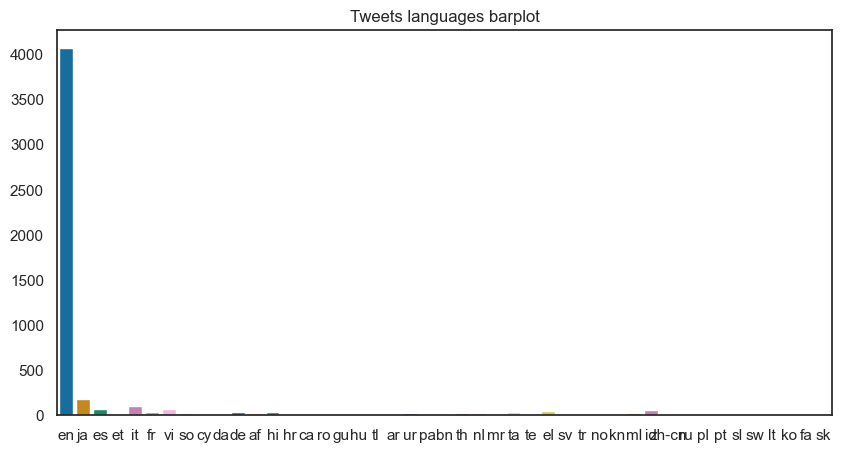

In [48]:
# with seaborn i want a barplot with the frequency of each language
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
plt.figure(figsize=(10,5))
sns.barplot(x=list(lang_dict.keys()), y=list(lang_dict.values()),palette="colorblind")
plt.title('Tweets languages barplot')
plt.show()